In [33]:
#Import pandas, with the reasone to conduct data tranfsormation, encodings and feature extraction
import pandas as pd
#Import our file for data processing
df = pd.read_csv('/media/vlad/Transcend/Microsoft VS Code/ready code/Data_science_projects/stroke.csv')

In [58]:
#sklearn we will need for model creation to desolve the classification prablem
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#matplotlib for data vizualization
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression

In [35]:
df.hypertension.value_counts()

no     4612
yes     498
Name: hypertension, dtype: int64

In [36]:
hypertension_map = {'no':0,'yes':1}
df.hypertension = df.hypertension.map(hypertension_map)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,yes,Yes,Private,Urban,228.69,36.6,formerly smoked,yes
1,51676,Female,61.0,0,no,Yes,Self-employed,Rural,202.21,NaN,never smoked,yes
2,31112,Male,80.0,0,yes,Yes,Private,Rural,105.92,32.5,never smoked,yes
3,60182,Female,49.0,0,no,Yes,Private,Urban,171.23,34.4,smokes,yes
4,1665,Female,79.0,1,no,Yes,Self-employed,Rural,174.12,24.0,never smoked,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,no,Yes,Private,Urban,83.75,NaN,never smoked,no
5106,44873,Female,81.0,0,no,Yes,Self-employed,Urban,125.20,40.0,never smoked,no
5107,19723,Female,35.0,0,no,Yes,Self-employed,Rural,82.99,30.6,never smoked,no
5108,37544,Male,51.0,0,no,Yes,Private,Rural,166.29,25.6,formerly smoked,no


In [37]:
heart_disease_map = {'yes':1,'no':0}
df.heart_disease = df.heart_disease.map(heart_disease_map)

In [38]:
ever_marr_map = {'Yes':1,'No':0}
df.ever_married = df.ever_married.map(ever_marr_map)

In [39]:
stroke_map = {'yes':1,'no':0}
df.stroke = df.stroke.map(stroke_map)

In [40]:
gender_map = {'Male':0,'Female':1}
df.gender = df.gender.map(gender_map)

In [41]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1.0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,0.0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,1.0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,1.0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,44873,1.0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,1.0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,0.0,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:
df = df.drop(['work_type'],axis= 1)
df = df.drop(['Residence_type'],axis=1)

In [43]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,228.69,36.6,formerly smoked,1
1,51676,1.0,61.0,0,0,1,202.21,NaN,never smoked,1
2,31112,0.0,80.0,0,1,1,105.92,32.5,never smoked,1
3,60182,1.0,49.0,0,0,1,171.23,34.4,smokes,1
4,1665,1.0,79.0,1,0,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,83.75,NaN,never smoked,0
5106,44873,1.0,81.0,0,0,1,125.20,40.0,never smoked,0
5107,19723,1.0,35.0,0,0,1,82.99,30.6,never smoked,0
5108,37544,0.0,51.0,0,0,1,166.29,25.6,formerly smoked,0


In [44]:
X = df
X = X.drop(['stroke'],axis =1)
y = df['stroke']

In [45]:
X.dropna(subset= ['bmi'],inplace= False)

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
0,9046,0.0,67.0,0,1,1,228.69,36.6,formerly smoked
2,31112,0.0,80.0,0,1,1,105.92,32.5,never smoked
3,60182,1.0,49.0,0,0,1,171.23,34.4,smokes
4,1665,1.0,79.0,1,0,1,174.12,24.0,never smoked
5,56669,0.0,81.0,0,0,1,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...
5104,14180,1.0,13.0,0,0,0,103.08,18.6,Unknown
5106,44873,1.0,81.0,0,0,1,125.20,40.0,never smoked
5107,19723,1.0,35.0,0,0,1,82.99,30.6,never smoked
5108,37544,0.0,51.0,0,0,1,166.29,25.6,formerly smoked


In [46]:
X

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
0,9046,0.0,67.0,0,1,1,228.69,36.6,formerly smoked
1,51676,1.0,61.0,0,0,1,202.21,NaN,never smoked
2,31112,0.0,80.0,0,1,1,105.92,32.5,never smoked
3,60182,1.0,49.0,0,0,1,171.23,34.4,smokes
4,1665,1.0,79.0,1,0,1,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,1,83.75,NaN,never smoked
5106,44873,1.0,81.0,0,0,1,125.20,40.0,never smoked
5107,19723,1.0,35.0,0,0,1,82.99,30.6,never smoked
5108,37544,0.0,51.0,0,0,1,166.29,25.6,formerly smoked


In [47]:
X["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [48]:
X.isnull().sum()
X['gender'] = X["gender"].fillna(value= X["gender"].mean())
X['bmi'] = X["bmi"].fillna(value= X["bmi"].mean())

In [49]:
smoking_map = {'never smoked':0,
                'smokes':1, 
                'Unknown':0, 
                'formerly smoked':2
}
X.smoking_status = X.smoking_status.map(smoking_map)
X = X.drop(['id'],axis=1)

In [50]:
X

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
0,0.0,67.0,0,1,1,228.69,36.600000,2
1,1.0,61.0,0,0,1,202.21,28.893237,0
2,0.0,80.0,0,1,1,105.92,32.500000,0
3,1.0,49.0,0,0,1,171.23,34.400000,1
4,1.0,79.0,1,0,1,174.12,24.000000,0
...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,1,83.75,28.893237,0
5106,1.0,81.0,0,0,1,125.20,40.000000,0
5107,1.0,35.0,0,0,1,82.99,30.600000,0
5108,0.0,51.0,0,0,1,166.29,25.600000,2


In [51]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [52]:
len(x_train)

3423

In [53]:
len(x_test)

1687

In [54]:
mt = DecisionTreeClassifier(max_depth= 7)
mt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [57]:
from sklearn.tree import export_graphviz
export_graphviz(mt, feature_names= ['gender','age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','smoking_status'], out_file = 'strokes_tree.dot', filled = True)
#with the reasone to vizual we need package pydot(pip intall pydot)
!dot -Tpng 'strokes_tree.dot' -o 'strokes_tree.png'

In [60]:
y_predict = mt.predict(x_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [61]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9324244220509781


(array([1659.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          28.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

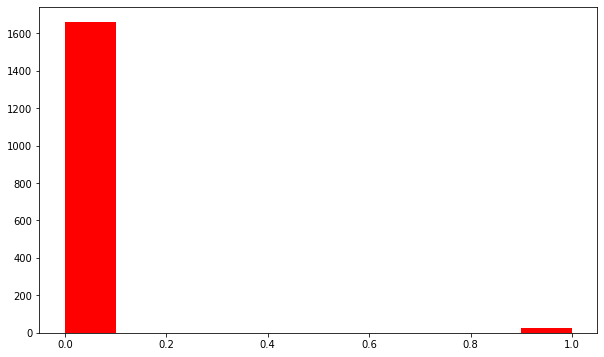

In [71]:
plt.figure(figsize=(10,6))
plt.hist(y_predict,color = 'r')